In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
def convert_to_csv(content):
    """
    This function find the columns name and columns value from input text whcih contains content of an arff file
    
    input: content of an arff file
    output: converted data in csv file format
    """
    isdata = False
    cols_name = ""
    data = []
    for line in content:
        if isdata :
            data.append(line)
        else:
            if '@attribute' in line:
                attribute = line.split()
                cols_name = cols_name + attribute[attribute.index('@attribute') + 1][1:-1] + ','
            elif '@data' in line:
                isdata = True
                cols_name = cols_name[:-1] + '\n'
                data.append(cols_name)

    return data

In [56]:
# Open arff file and read all the lines of it, the call convert function to convert them into csv format
# finally save data into a csv file

with open('chronic_kidney_disease.arff' , "r") as arff_file:
        content = arff_file.readlines()
        data = convert_to_csv(content)
        with open('Chronic_kidney_disease.csv', 'w') as csv_file:
            csv_file.writelines(data)
        csv_file.close()
arff_file.close()

In [59]:
df= pd.read_csv('Chronic_kidney_disease.csv', error_bad_lines=False)

b'Skipping line 71: expected 25 fields, saw 26\nSkipping line 74: expected 25 fields, saw 26\nSkipping line 371: expected 25 fields, saw 26\n'


In [628]:
df= pd.read_csv('Chronic_kidney_disease.csv', error_bad_lines=False)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Some of the information has ? value which means they are missing, the we should change them to NaN value for further process**

## EDA

### Profile

In [629]:
df.shape

(400, 25)

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

**Some of the data seems numerical but type of all columns are Object then we need to change type of some columns and this should be done as per the metadata that comes with this dataset and also before that we need t cnvert ? to nan in these fields**  

In [631]:
num_cols = ['age', 'bp' , 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv' , 'wbcc' , 'rbcc'] 
cat_cols = [x for x in df.columns if x not in num_cols]

In [632]:
df[num_cols] = df[num_cols].replace('?' , np.nan)

In [633]:
df.isna().sum()

age        9
bp        12
sg         0
al         0
su         0
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [634]:
for col in num_cols :
    df[col] = np.array(df[col]).astype('float32')

In [635]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.0,42.0,55.00,64.5,90.000000
bp,388.0,76.469070,13.683638,50.0,70.0,80.00,80.0,180.000000
bgr,356.0,148.036514,79.281715,22.0,99.0,121.00,163.0,490.000000
bu,381.0,57.425720,50.503006,1.5,27.0,42.00,66.0,391.000000
sc,383.0,3.072454,5.741126,0.4,0.9,1.30,2.8,76.000000
sod,313.0,137.528748,10.408752,4.5,135.0,138.00,142.0,163.000000
pot,312.0,4.627244,3.193904,2.5,3.8,4.40,4.9,47.000000
hemo,348.0,12.526438,2.912587,3.1,10.3,12.65,15.0,17.799999
pcv,329.0,38.884499,8.990105,9.0,32.0,40.00,45.0,54.000000
wbcc,294.0,8406.122070,2944.474121,2200.0,6500.0,8000.00,9800.0,26400.000000


In [636]:
df.duplicated().sum()

0

In [637]:
df.nunique()

age       76
bp        10
sg         6
al         7
su         7
rbc        3
pc         3
pcc        3
ba         3
bgr      146
bu       118
sc        84
sod       34
pot       40
hemo     115
pcv       42
wbcc      89
rbcc      45
htn        3
dm         4
cad        3
appet      3
pe         3
ane        3
class      2
dtype: int64

In [638]:
df.memory_usage()

Index     128
age      1600
bp       1600
sg       3200
al       3200
su       3200
rbc      3200
pc       3200
pcc      3200
ba       3200
bgr      1600
bu       1600
sc       1600
sod      1600
pot      1600
hemo     1600
pcv      1600
wbcc     1600
rbcc     1600
htn      3200
dm       3200
cad      3200
appet    3200
pe       3200
ane      3200
class    3200
dtype: int64

In [639]:
df[cat_cols].describe().T

,count,unique,top,freq
sg,400,6,1.02,106
al,400,7,0,199
su,400,7,0,290
rbc,400,3,normal,201
pc,400,3,normal,259
pcc,400,3,notpresent,354
ba,400,3,notpresent,374
htn,400,3,no,251
dm,400,4,no,261
cad,400,3,no,364


**This report shows mst of the categrical data are binary and we can easily transfer with getdummies but for other columns we should select best method of encoding**

## Statistical Analysis 

In [640]:
df.corr()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
bgr,0.244992,0.160193,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309
hemo,-0.192928,-0.306540,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.895382,-0.169413,0.798880
pcv,-0.242119,-0.326319,-0.301385,-0.607621,-0.404193,0.376914,-0.163182,0.895382,1.000000,-0.197022,0.791625
wbcc,0.118339,0.029753,0.150015,0.050462,-0.006390,0.007277,-0.105576,-0.169413,-0.197022,1.000000,-0.158163


**sc and bu , hemo and bu, pcv and bu , rbcc and bu , sd and sc are mildly correlated, pcv   and hemo, rbcc and hemo, pcv abd rbcc are highly correlated**

In [641]:
df.cov()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,294.799082,35.721824,312.960449,168.874176,12.992538,-17.508681,3.140704,-9.485205,-36.287974,5.916518e+03,-4.320255
bp,35.721824,187.241935,172.804333,131.777329,11.721205,-16.826035,3.340455,-12.113383,-40.219142,1.231293e+03,-3.808377
bgr,312.960449,172.804333,6285.590212,534.948764,39.269501,-139.222904,16.181768,-69.989341,-215.834888,3.440928e+04,-22.168621
bu,168.874176,131.777329,534.948764,2550.553600,169.414284,-181.834359,61.255907,-86.465992,-266.034963,7.345048e+03,-29.735135
sc,12.992538,11.721205,39.269501,169.414284,32.960528,-41.695860,4.214276,-6.201124,-19.590197,-1.019981e+02,-2.325790
sod,-17.508681,-16.826035,-139.222904,-181.834359,-41.695860,108.342119,2.245921,11.835595,38.401251,2.331235e+02,4.106070
pot,3.140704,3.340455,16.181768,61.255907,4.214276,2.245921,10.201024,-1.083655,-4.167589,-8.551289e+02,-0.479363
hemo,-9.485205,-12.113383,-69.989341,-86.465992,-6.201124,11.835595,-1.083655,8.483161,23.172038,-1.458413e+03,2.357713
pcv,-36.287974,-40.219142,-215.834888,-266.034963,-19.590197,38.401251,-4.167589,23.172038,80.821985,-5.276691e+03,7.278245
wbcc,5916.518315,1231.293097,34409.279445,7345.048081,-101.998102,233.123498,-855.128934,-1458.412936,-5276.691204,8.669928e+06,-479.744646


In [642]:
df.skew()

age     -0.668259
bp       1.605429
bgr      2.010773
bu       2.634375
sc       7.509539
sod     -6.996568
pot     11.582956
hemo    -0.335095
pcv     -0.433679
wbcc     1.621589
rbcc    -0.183329
dtype: float32

**It doesnot seem there is high skewness in columns, we can check them by plotting in more visual way t be sure**

## Vilualization

### Univariate

In [643]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

#### Numerical vatiables

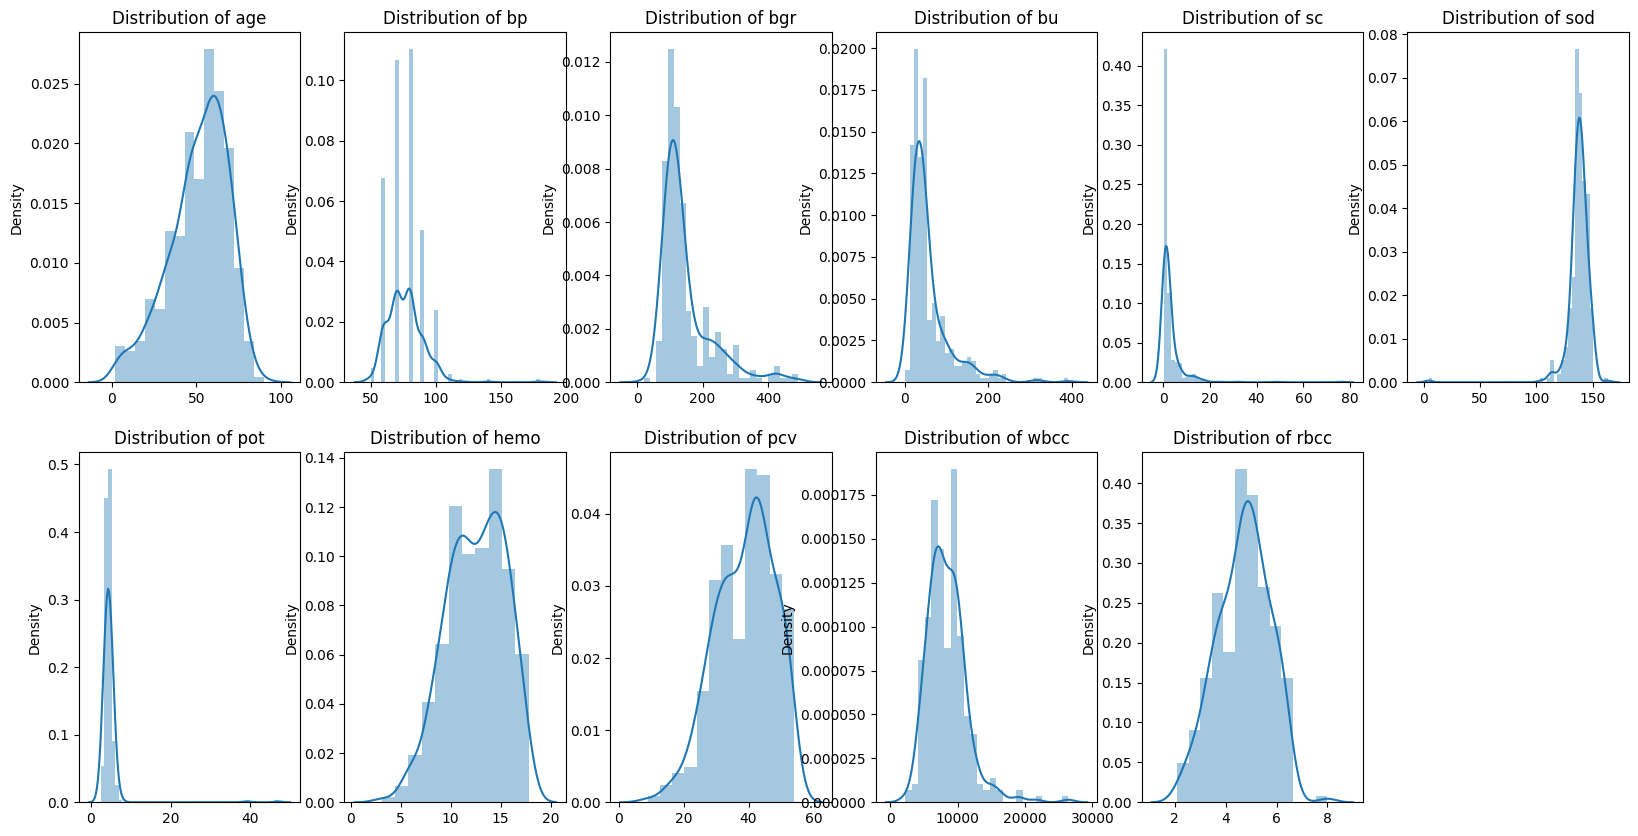

In [644]:
i = 1
plt.figure(figsize=(20,10))
for col in num_cols:
    plt.subplot(2, 6 , i)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    i +=1

**As it is bseved there are some outliers in our numerical data and need more investigation**

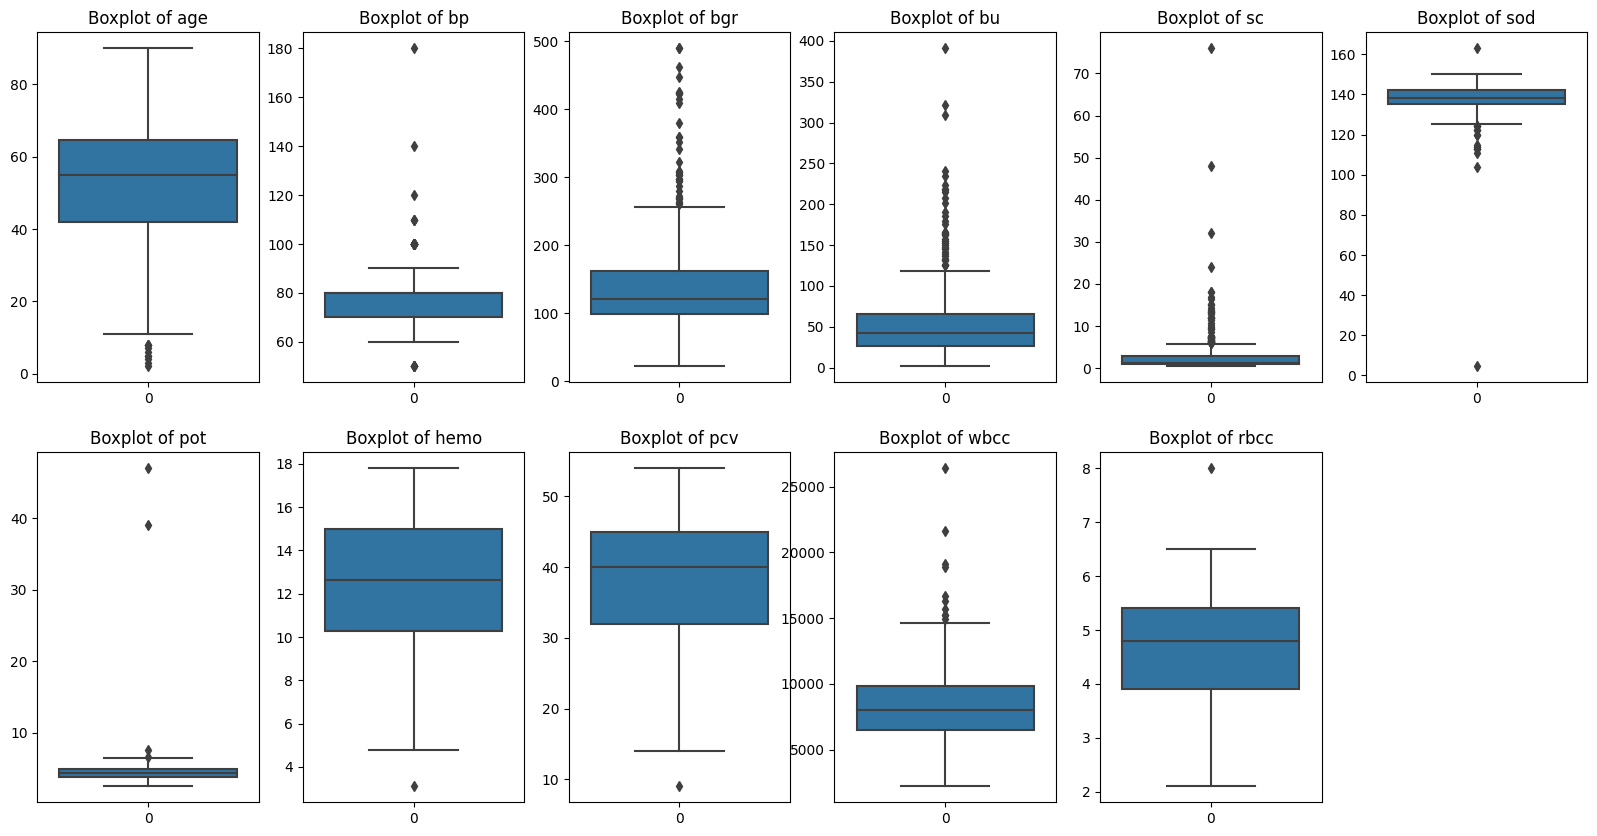

In [645]:
i = 1
plt.figure(figsize=(20,10))
for col in num_cols:
    plt.subplot(2, 6 , i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    i +=1

#### Categorical variables

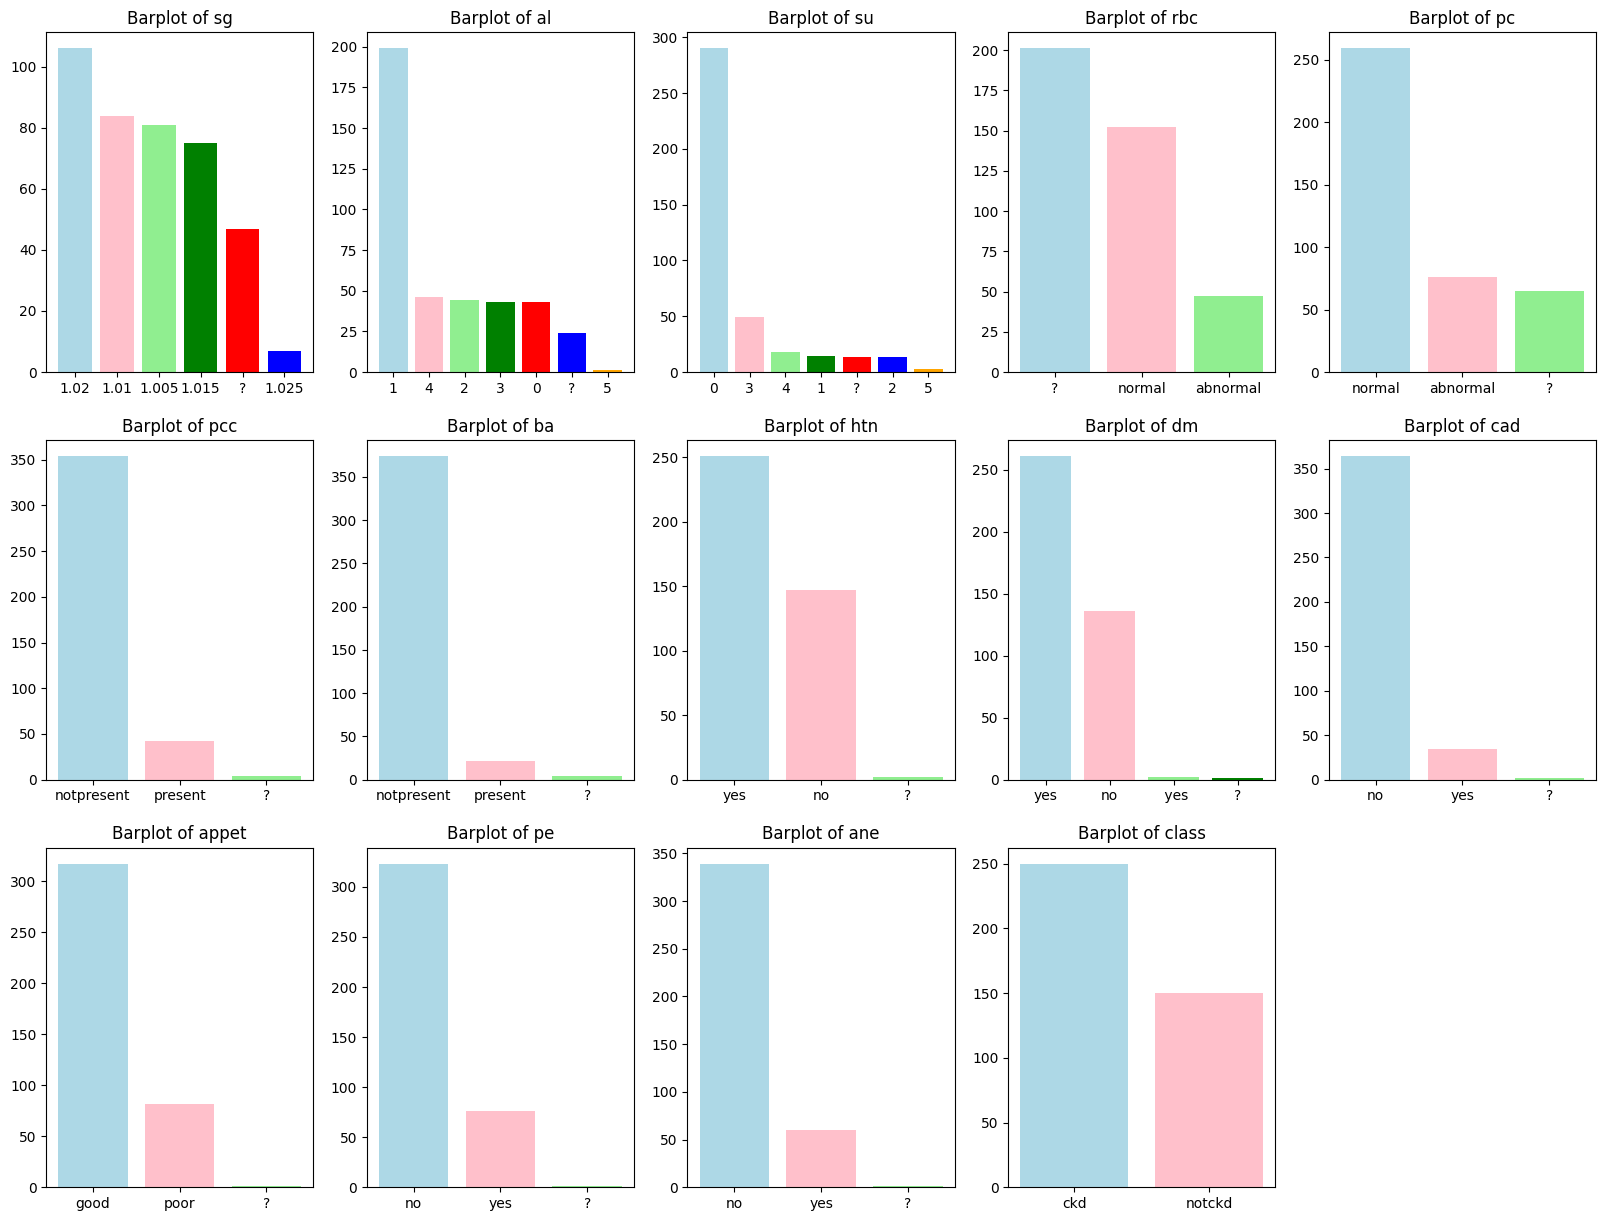

In [646]:
i = 1
plt.figure(figsize=(20,15))
for col in cat_cols:
    plt.subplot(3, 5 , i)
    plt.bar(df[col].unique() , df[col].value_counts(), 
            color = ['lightblue', 'pink', 'lightgreen', 'green','red', 'blue','orange'])
    plt.title(f'Barplot of {col}')
    plt.xlabel('')
    i +=1

**Soome of the columns are imbalance, number of Nan value in sme columns are high** 

### Biovariate

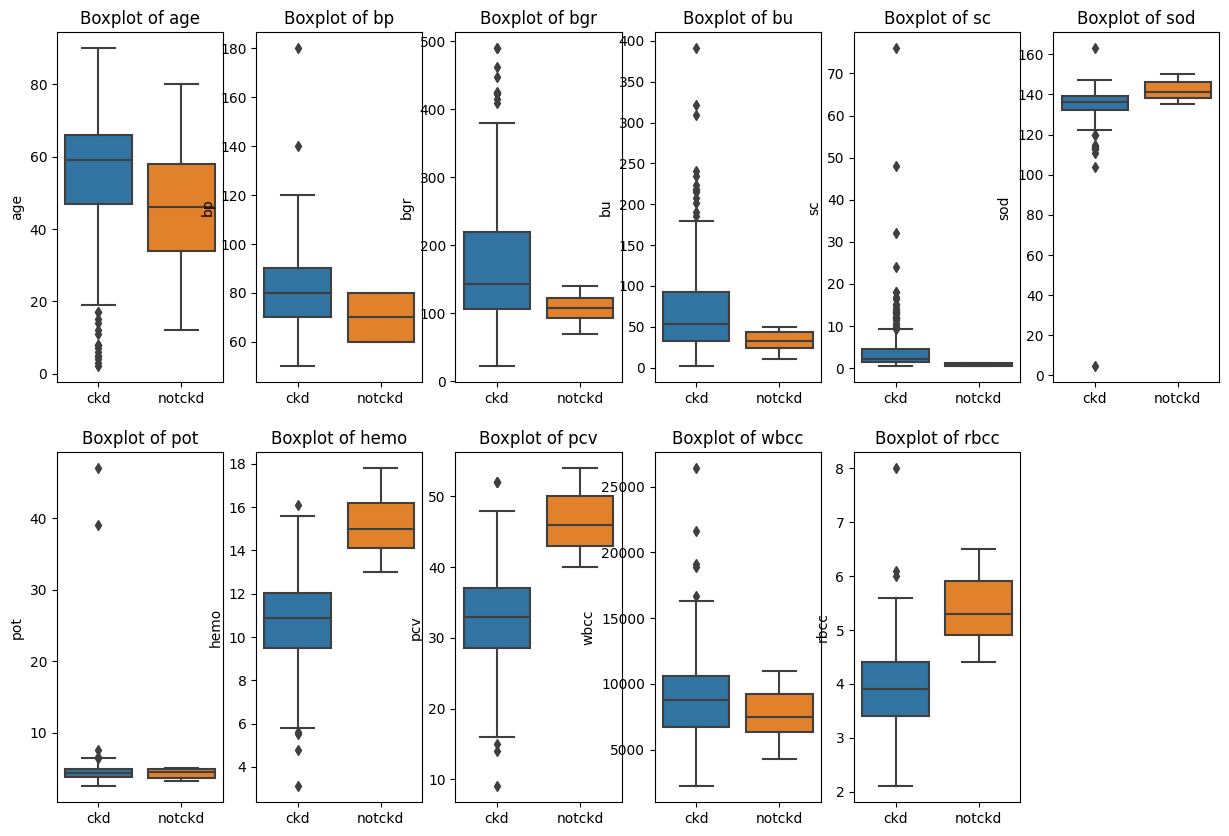

In [647]:
i = 1
plt.figure(figsize=(15,10))
for col in num_cols:
    plt.subplot(2, 6 , i)
    sns.boxplot(df , y= df[col], x = df['class'])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    i +=1

**The plots show distribution of data are not same per target class such as pcv, hemo, rbcc, sod**
**This may say that during filling missing data it is better we fill them seperately per class, in this way we will be sure that the variance of data per class will remain same. 

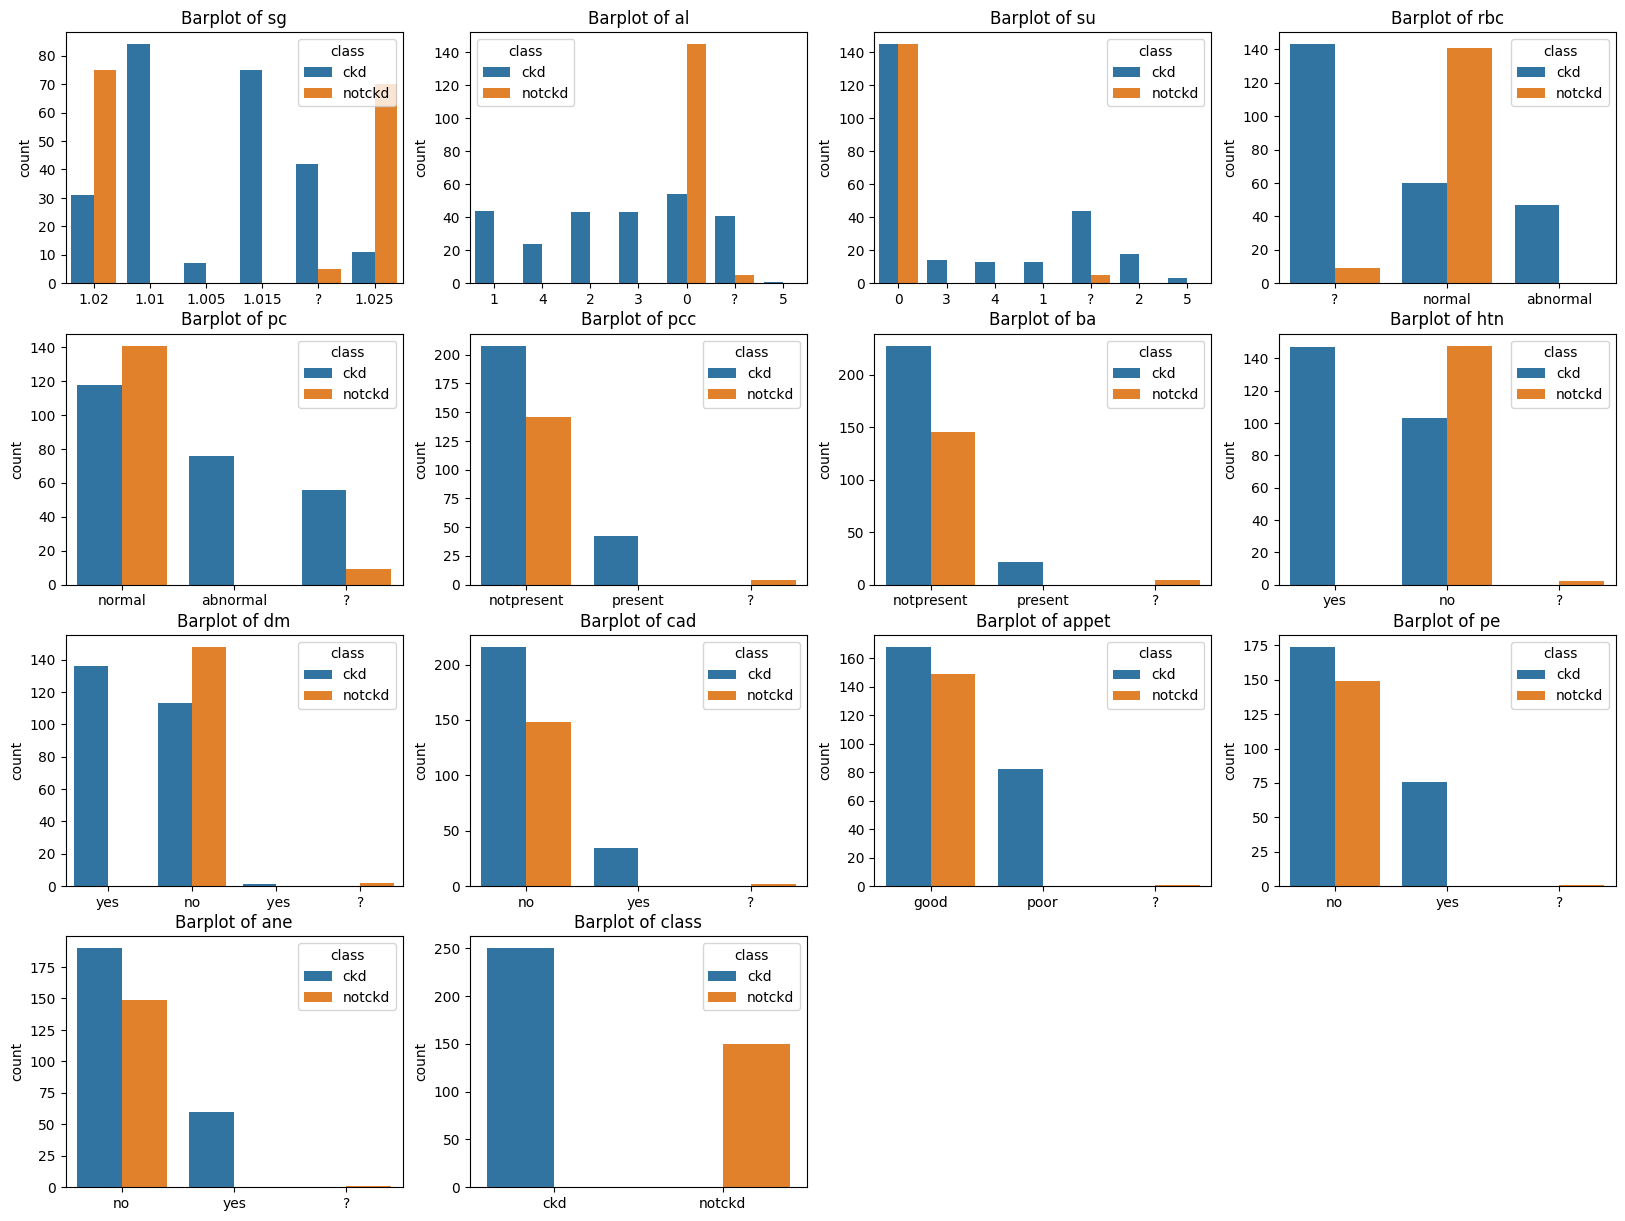

In [648]:
i = 1
plt.figure(figsize=(20,15))
for col in cat_cols:
    plt.subplot(4, 4 , i)
    sns.countplot(df , x = df[col] , hue = df['class'])
    plt.title(f'Barplot of {col}')
    plt.xlabel('')
    i +=1

**The distribution of data are not same per each class of target variable**

### Multivariate

<AxesSubplot: >

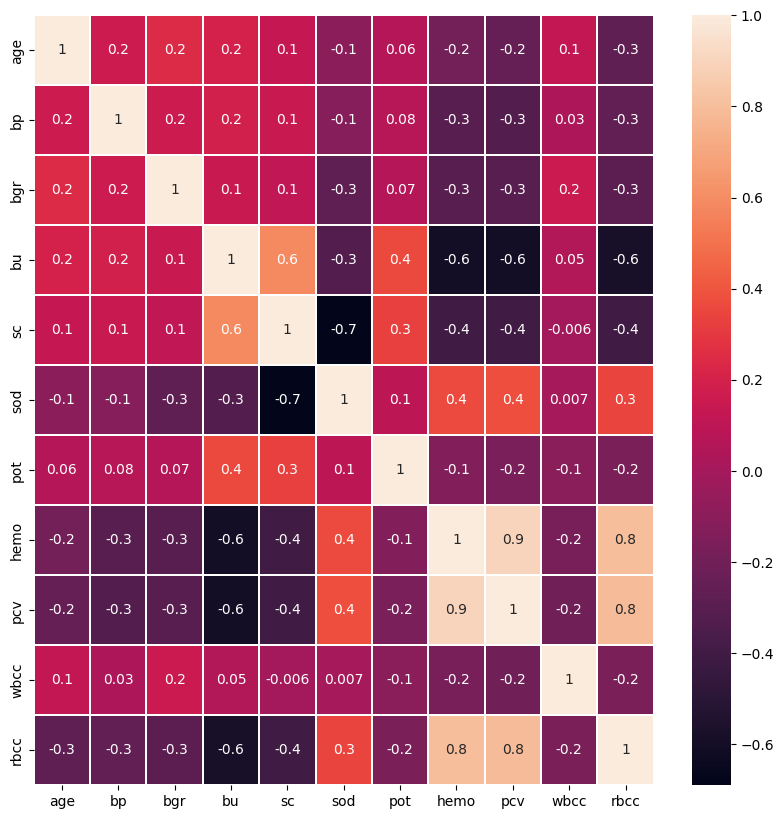

In [649]:
plt.figure(figsize=(10 ,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.3,fmt='.1g')

**The heatmap also doesnot show any high positive correlatin between variables expect hemo ad pcv with rbcc , and pcv with hemo, also sc with bu has medium positive correlation. on the other side bu has medium negative correlation with rbcc, pcv and hemo, sod with sc also has a bit high negative correlatin**

**In addition age does not have any specific correlatin with all other factors and may shows this disease is not related to age of people**

# Preprocessing

## Handling Missing values

In [650]:
# firstly same as numerical data for categorical data we need to replace ? value with Nan 
df[cat_cols] = df[cat_cols].replace('?' , np.nan)

In [651]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

#### Categorical columns

In [652]:
# some of the columns have less missig value and we can drp them
df[df['htn'].isna()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
288,56.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,70.0,...,50.0,11000.0,5.1,NaN,NaN,NaN,good,no,no,notckd
297,53.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,116.0,...,45.0,7700.0,5.2,NaN,NaN,NaN,good,no,no,notckd


In [653]:
print(df.groupby(['htn'])['class'].value_counts())
print(df.groupby(['cad'])['class'].value_counts())
print(df.groupby(['dm'])['class'].value_counts())

htn  class 
no   notckd    148
     ckd       103
yes  ckd       147
Name: class, dtype: int64
cad  class 
no   ckd       216
     notckd    148
yes  ckd        34
Name: class, dtype: int64
dm    class 
 yes  ckd         1
no    notckd    148
      ckd       113
yes   ckd       136
Name: class, dtype: int64


Our missing values belongs to notckd class in all three fields with tw missing value, number f missing value is less and most of the population of notckd class has no vlaue then we will fill them with no too  

In [654]:
df['htn'].fillna('no', inplace = True)

# dm column has some wrong value first we fix it and then check number of each value for our class
df['dm'].replace(' yes', 'yes', inplace = True)
df['dm'].fillna('no', inplace = True)
df['cad'].fillna('no', inplace = True)

In [655]:
df[df['appet'].isna()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
294,75.0,60.0,1.02,0,0,normal,normal,notpresent,notpresent,110.0,...,40.0,8300.0,5.8,no,no,no,NaN,NaN,NaN,notckd


In [656]:
#number of vilue in each category per values of class column
print(df.groupby(['appet'])['class'].value_counts())
print(df.groupby(['pe'])['class'].value_counts())
print(df.groupby(['ane'])['class'].value_counts())

appet  class 
good   ckd       168
       notckd    149
poor   ckd        82
Name: class, dtype: int64
pe   class 
no   ckd       174
     notckd    149
yes  ckd        76
Name: class, dtype: int64
ane  class 
no   ckd       190
     notckd    149
yes  ckd        60
Name: class, dtype: int64


In [657]:
# For these three fields also we fill missing value with same manner
df['appet'].fillna('good', inplace = True)
df['pe'].fillna('no', inplace = True)
df['ane'].fillna('no', inplace = True)

In [658]:
df[df['pcc'].isna()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
290,54.0,70.0,1.02,0,0,NaN,NaN,NaN,NaN,76.0,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd
300,45.0,60.0,1.02,0,0,normal,normal,NaN,NaN,114.0,...,43.0,9200.0,5.8,no,no,no,good,no,no,notckd
316,35.0,NaN,1.02,0,0,normal,normal,NaN,NaN,99.0,...,48.0,5000.0,5.2,no,no,no,good,no,no,notckd
328,28.0,70.0,1.02,0,0,normal,normal,NaN,NaN,131.0,...,45.0,8600.0,6.5,no,no,no,good,no,no,notckd


the missing value of Both pcc and ba which has 4 missing value happend in same rows whcih are blngs to notckd class

In [659]:
#number of vilue in each category per values of class column
print(df.groupby(['pcc'])['class'].value_counts())
print(df.groupby(['ba'])['class'].value_counts())

pcc         class 
notpresent  ckd       208
            notckd    146
present     ckd        42
Name: class, dtype: int64
ba          class 
notpresent  ckd       228
            notckd    146
present     ckd        22
Name: class, dtype: int64


In [660]:
# All the value for notckd class has nopresent value then we set missing value withsame value 
df['pcc'].fillna('notpresent', inplace = True)
df['ba'].fillna('notpresent', inplace = True)

**In other categorical columns number of missing data is high then we selet KNNimputer for imputing them, for this we need to Encode categorical data then we can use KNNimputer, as our categorical data are ordinal then we use OrdinalEncoder for it** 

In [661]:
from sklearn.preprocessing import OrdinalEncoder
def encode_data(data):
    """
    This function apply OrdinalEncoder on input data but before that remove NaN value then replace
    new value with only NotNull data
    
    input: data of a column
    output: the encoded data
    """
    encoder = OrdinalEncoder()
    withoutnulls = np.array(data.dropna())
    withoutnulls = withoutnulls.reshape(-1,1)
    encoded_data = encoder.fit_transform(withoutnulls)
    data.loc[data.notnull()] = np.squeeze(encoded_data)
    return data

for x in cat_cols :
    encode_data(df[x])

In [662]:
df[cat_cols]

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,3.0,1.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [663]:
# Imput NaN value of categorical data with KNNImouter
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_data = np.round(imputer.fit_transform(df[cat_cols]))
cat_df = pd.DataFrame(imputed_data , columns= cat_cols)

In [664]:
cat_df.isna().sum()

sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [665]:
for col in cat_cols:
    print(cat_df[col].unique())

[3. 1. 0. 2. 4.]
[1. 4. 2. 3. 0. 5.]
[0. 3. 4. 1. 2. 5.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


#### Numerical columns

In [666]:
def print_centerizeinf(data , col):
    """
    This function calculate mean, median nd std of column and also same value per each category in class column
    
    input:
        data : dataset containg values
        col  : name of the column for calulating values
    output:
        print mean, median and std of a given column
    """
    
    print(f'Number of missing "{col}" in each group of class:\n', df[df[col].isna()]['class'].value_counts())
    print(f'\nMean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'STD: {df[col].std()}')
    print(f'\nMean of "{col}" per: ',df.groupby(['class'])[col].mean())
    print(f'\nMedian of "{col}" per: ',df.groupby(['class'])[col].median())
    print(f'\nSTD of "{col}" per: ', df.groupby(['class'])[col].std())

In [667]:
print_centerizeinf(df , 'age')

Number of missing "age" in each group of class:
 0.0    8
1.0    1
Name: class, dtype: int64

Mean: 51.483375549316406
Median: 55.0
STD: 17.169713973999023

Mean of "age" per:  class
0.0    54.541321
1.0    46.516777
Name: age, dtype: float32

Median of "age" per:  class
0.0    59.0
1.0    46.0
Name: age, dtype: float32

STD of "age" per:  class
0.0    17.388899
1.0    15.631138
Name: age, dtype: float64


In [668]:
# there is a big difference between mean and median of each group then it is better we fill missing value per class field.
#this will help each median of each categry f class column remaid same.
df['age'] = df.groupby(['class'])['age'].transform(lambda x: x.fillna(x.median()))

In [669]:
print_centerizeinf(df , 'bp')

Number of missing "bp" in each group of class:
 0.0    10
1.0     2
Name: class, dtype: int64

Mean: 76.46907043457031
Median: 80.0
STD: 13.683637619018555

Mean of "bp" per:  class
0.0    79.625000
1.0    71.351349
Name: bp, dtype: float32

Median of "bp" per:  class
0.0    80.0
1.0    70.0
Name: bp, dtype: float32

STD of "bp" per:  class
0.0    15.234053
1.0     8.543498
Name: bp, dtype: float64


In [670]:
# based on report it is better to replace Nan value for each class seperately. Varience is high then median is better selection.
df['bp'] = df.groupby(['class'])['bp'].transform(lambda x: x.fillna(x.median()))

In [671]:
print_centerizeinf(df , 'bu')

Number of missing "bu" in each group of class:
 0.0    13
1.0     6
Name: class, dtype: int64

Mean: 57.42572021484375
Median: 42.0
STD: 50.50300598144531

Mean of "bu" per:  class
0.0    72.389030
1.0    32.798611
Name: bu, dtype: float32

Median of "bu" per:  class
0.0    53.0
1.0    33.0
Name: bu, dtype: float32

STD of "bu" per:  class
0.0    58.587236
1.0    11.450459
Name: bu, dtype: float64


In [672]:
print_centerizeinf(df , 'sc')

Number of missing "sc" in each group of class:
 0.0    12
1.0     5
Name: class, dtype: int64

Mean: 3.0724542140960693
Median: 1.2999999523162842
STD: 5.74112606048584

Mean of "sc" per:  class
0.0    4.414916
1.0    0.868966
Name: sc, dtype: float32

Median of "sc" per:  class
0.0    2.25
1.0    0.90
Name: sc, dtype: float32

STD of "sc" per:  class
0.0    6.950275
1.0    0.255092
Name: sc, dtype: float64


In [673]:
df['sc'] = df.groupby(['class'])['sc'].transform(lambda x: x.fillna(x.median()))

In [674]:
# Imput NaN value of numarical data with KNNImouter
num_imputer = KNNImputer()
num_imputed_data = np.round(num_imputer.fit_transform(df[num_cols]), decimals= 3)
num_df = pd.DataFrame(num_imputed_data , columns= num_cols)

In [675]:
num_df.isna().sum()

age     0
bp      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [676]:
# Concatiate imputed categorical and numarical datasets 
final_df = pd.concat([num_df , cat_df], axis = 1)
final_df.shape

(400, 25)

In [677]:
final_df.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.000000,36.0,1.2,138.800003,4.30,15.4,44.0,7800.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,116.400002,18.0,0.8,137.399994,4.00,11.3,38.0,6000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,423.000000,53.0,1.8,133.800003,4.20,9.6,31.0,7500.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.50,11.2,32.0,6700.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,106.000000,26.0,1.4,138.399994,3.98,11.6,35.0,7300.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling numerical data

**In medical domain outlier may have some meaning and removing them may cause loss of information then here we use MinMax scaler to decrease effect of outliers. In addition, the numarical columns has different scale which impact on model performance and computational process too.  

In [678]:
from sklearn.preprocessing import MinMaxScaler

mms= MinMaxScaler()
final_df[num_cols] = mms.fit_transform(final_df[num_cols])
final_df[num_cols].head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,0.522727,0.230769,0.211538,0.088575,0.010582,0.847319,0.040449,0.836735,0.777778,0.231405,0.525424
1,0.056818,0.000000,0.201709,0.042362,0.005291,0.838486,0.033708,0.557823,0.644444,0.157025,0.484746
2,0.681818,0.230769,0.856838,0.132221,0.018519,0.815773,0.038202,0.442177,0.488889,0.219008,0.288136
3,0.522727,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
4,0.556818,0.230769,0.179487,0.062901,0.013228,0.844795,0.033258,0.578231,0.577778,0.210744,0.423729


In [679]:
final_df.columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [682]:
final_df.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.211538,0.088575,0.010582,0.847319,0.040449,0.836735,0.777778,0.231405,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.201709,0.042362,0.005291,0.838486,0.033708,0.557823,0.644444,0.157025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.856838,0.132221,0.018519,0.815773,0.038202,0.442177,0.488889,0.219008,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.179487,0.062901,0.013228,0.844795,0.033258,0.578231,0.577778,0.210744,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
